In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from xgboost import XGBClassifier
from wordcloud import WordCloud
from nltk import pos_tag
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords, wordnet
from nltk.tokenize import sent_tokenize, word_tokenize
import string
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression,SGDClassifier, LinearRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from keras.layers import Dense, Conv1D, MaxPool1D, Flatten, Dropout, Embedding, LSTM
from keras.models import Sequential
from keras.utils import to_categorical 
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk.tokenize import sent_tokenize
import re
import spacy
from os import path
from glob import glob

Using TensorFlow backend.


In [2]:
train_df = pd.read_csv('../input/data-set/Changed_1.csv', encoding='cp1252')



In [3]:
train_df.head()
!pip install tika

  Created wheel for tika: filename=tika-1.24-py3-none-any.whl size=32884 sha256=9fb7658e8f26537ca272378a5fc2b6ea0b1c6c2e2babf20f3ac98e8f057f6711
  Stored in directory: /root/.cache/pip/wheels/ec/2b/38/58ff05467a742e32f67f5d0de048fa046e764e2fbb25ac93f3
Successfully built tika


In [4]:
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk.tokenize import sent_tokenize
import re
import spacy
from os import path
from glob import glob 
from tika import parser

def find_ext(dr, ext):
    return glob(path.join(dr,"*.{}".format(ext)))



scanlist = []

# FOR SENIORITY
listOfDoc = find_ext("../input/test-data2","pdf")


for g in range(0,len(listOfDoc)):
    try:
        p=listOfDoc[g]
        raw = parser.from_file(p)
        fulldoc=raw['content']

        fulldoc = fulldoc.replace('\n',' ')
        fulldoc = re.sub(r' +',' ', fulldoc)
        docarr = sent_tokenize(fulldoc)

        if len(fulldoc)==0:
            print("No Text Extracted Require OCR")
       

        li3 = []
        for i in docarr:
            if(re.findall("secure", i, re.IGNORECASE)):
                li3.append(i)

        print("DOCUEMNT ",listOfDoc[g])

        sp=fulldoc.split(".")

        z=0
        sentence=[]

        pNOI=0
        pSenior=0
        for i in li3:
            i=i.split(" ")
            a=0
            b=0
            c=0
            f=0
            r=0
            x=""
            
            for j in i:
                j=j.lower()
                if j=="status":
                    r=1
                    x=x+j+" "
                if j=="notes":
                    f=1
                    x=x+j+" "
                if j=="senior":
                    a=1
                    x=x+j+" "
                if j=="secured" or j=="unsecured":
                    b=1
                    x=x+j+" "
                if j=="subordianted" or j=="unsubordinated":
                    c=1
                    x=x+j+" "

            if (a+b+c+f+r)>=2:
                sentence.append(x)
                
                z=1
                print(" ")

        count_key=[]
        g=0
        sent=""
        fg=0
        for i in sentence:
            a=0
            b=0
            c=0
            f=0
            r=0
            i=i.split(" ")
            for j in i:
                j=j.lower()
                if j=="status":
                    r=1
                        
                if j=="notes":
                    f=1
                        
                if j=="senior":
                    a=1
                        
                if j=="secured" or j=="unsecured":
                    b=1
                        
                if j=="subordianted" or j=="unsubordinated":
                    c=1
            count_key.append(a+b+c+f+r)
            if b==1 and c==1:
                print(i)
                xc=0
                kj=0
                lk=0
                
                for x in i:
                    x=x.lower()
                    
                    if x=="secured":
                        xc=1
                    if x=="unsecured":
                        xc=2

                    
                    if x=="unsubordinated":
                        kj=1
                    if x=="subordinated":
                        kj=2
                    if x=="senior":
                        lk=1

                if kj==1:
                    if lk==1:
                        print("Seniority- Senior Unsubordinated")
                        pSenior=1
                    else:
                        print("Seniority- Unsubordinated")
                        pSenior=1
                if kj==2:
                    if lk==1:
                        print("Seniority- Senior subordinated")
                        pSenior=1
                    else:
                        pSenior=1
                        print("Seniority- Subordinated")

                if xc==1:
                    print("NOI- Secured")
                    pNOI=1
                if xc==2:
                    print("NOI- Unsecured")
                    pNOI=1
                                              
                
                fg=1
                break
            
            if (a+b+c+f+r)>g:
                sent=i
                g=a+b+c+f+r
        if fg==0:
            #print(sent)
            xc=0
            kj=0
            lk=0
            for x in sent:
                    x=x.lower()
                    
                    if x=="secured":
                        xc=1
                    if x=="unsecured":
                        xc=2

                    
                    if x=="unsubordinated":
                        kj=1
                        
                    if x=="subordinated":
                        kj=2
                    if x=="senior":
                        lk=1
                
            if kj==0 and lk==1:
                print("Seniority- Senior")
                pSenior=1
            elif kj==1:
                print("Seniority- Unsubordinated")
                pSenior=1
            elif kj==2:
                print("Seniority- Subordinated")
                pSenior=1

            if xc==1:
                print("NOI- Secured")
                pNOI=1
            if xc==2:
                print("NOI- Unsecured")
                pNOI=1
                               
                
        if z==0 or pSenior==0:
            a=0
            b=0
            c=0
            f=0
            r=0
            w=0
            #print("full extraction")
            for i in sp:
                i=i.split(" ")
                x=""
                for j in i:
                    j=j.lower()
                    if j=="debt":
                        w=1
                        
                    if j=="status" or j=="status:":
                        r=1
                        
                    if j=="notes":
                        f=1
                        
                    if j=="senior":
                        
                        if a==0:
                            print("Seniority- Senior")
                        a=1
                        
                    if j=="secured" or j=="unsecured":
                        
                        if b==0 and pNOI==0:
                            print("NOI- ",j)
                        b=1
                    if j=="subordianted" or j=="unsubordinated":
                        
                        if c==0:
                            print("Seniority- ",j)
                        c=1
                                  
               
    except:
        print("Exception occured in doc ",g)

2020-07-08 08:47:23,863 [MainThread  ] [INFO ]  Retrieving http://search.maven.org/remotecontent?filepath=org/apache/tika/tika-server/1.24/tika-server-1.24.jar to /tmp/tika-server.jar.
2020-07-08 08:47:24,790 [MainThread  ] [INFO ]  Retrieving http://search.maven.org/remotecontent?filepath=org/apache/tika/tika-server/1.24/tika-server-1.24.jar.md5 to /tmp/tika-server.jar.md5.
2020-07-08 08:47:25,276 [MainThread  ] [WARNI]  Failed to see startup log message; retrying...


DOCUEMNT  ../input/test-data2/CA13607GFB55.pdf
 
['senior', 'notes', 'unsecured', 'unsecured', 'unsubordinated', '']
Seniority- Senior Unsubordinated
NOI- Unsecured


In [5]:
from tika import parser 
#For issue Price
raw = parser.from_file("../input/test-data2/CA13607GFB55.pdf")

In [6]:
fulldoc=raw['content']

fulldoc = fulldoc.replace('\n',' ')
fulldoc = re.sub(r' +',' ', fulldoc)
docarr = sent_tokenize(fulldoc)


if len(fulldoc)==0:
    print("No Text Extracted Require OCR")
       

li3 = []
for i in docarr:
    if(re.findall("issue price", i, re.IGNORECASE)):
        li3.append(i)
df = pd.DataFrame({'text':li3, 
                    }) 
test_df=df
#print(test_df.text[0])


In [7]:
train_df.head()

,text,choose_one
0,Unless this certificate is presented by an au...,1
1,The terms of the 2028 Notes have been confirme...,1
2,Those further notes will have the same terms (...,0
3,1 Final Terms dated 15 April 2015 CAISSE FRAN...,1
4,1 Issuer: Caisse Française de Financement Loca...,1


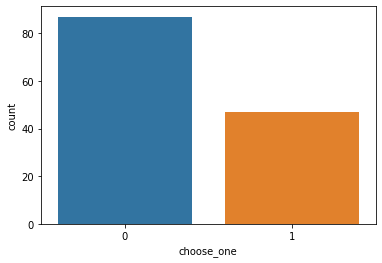

In [8]:
sns.countplot(train_df.choose_one)

In [9]:
stop = set(stopwords.words('english'))
punctuations = list(string.punctuation)
stop.update(punctuations)
print(stop)

{'can', 'there', 'o', 'won', 'y', "mustn't", 'itself', 'against', '_', '\\', '#', "you'd", '+', 'isn', 'her', "won't", "hasn't", 'when', 'up', 'any', '@', 'on', "it's", 'only', '`', 'at', '^', "don't", 'myself', 'that', 'be', 'my', 'they', 'not', 'been', 'about', '$', 'in', 'into', "should've", 'than', 'wasn', 'me', 'with', 'don', 'are', 'some', 'mightn', 'all', 'yours', '~', 'aren', 'wouldn', '.', 'yourself', 'whom', 'was', 'hasn', 'if', '/', 'during', 'were', 'as', 'under', 'couldn', 'our', 'needn', 'below', 'again', '"', "you'll", 'does', "shan't", "hadn't", '!', ';', 'once', 'their', 'through', 'has', 'now', 'you', 'before', '|', "she's", 'hers', 'am', 'those', 'for', 'she', 'but', 'same', 'above', 're', 'to', 'too', 'had', 'few', "isn't", 'them', "wouldn't", '-', ']', ')', 'how', 'doesn', 'from', 'further', 'most', ':', 'it', 'haven', 'a', 'your', '}', 'out', "you've", 'this', 'doing', 'who', 'because', 'both', 'should', 'ain', "didn't", 'own', '(', 'between', 'so', 'no', 'themsel

In [10]:
def remove_numbers(text):
    text = ''.join([i for i in text if not i.isdigit()])         
    return text

def remove_URL(text):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'',text)

def remove_html(text):
    html=re.compile(r'<.*?>')
    return html.sub(r'',text)

def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

In [11]:
train_df.text = train_df.text.apply(remove_numbers)
train_df.text = train_df.text.apply(remove_URL)
train_df.text = train_df.text.apply(remove_html)
train_df.text = train_df.text.apply(remove_emoji)
train_df.head()

,text,choose_one
0,Unless this certificate is presented by an au...,1
1,The terms of the Notes have been confirmed to...,1
2,Those further notes will have the same terms (...,0
3,Final Terms dated April CAISSE FRANÇAISE D...,1
4,Issuer: Caisse Française de Financement Local...,1


In [12]:

test_df.head()

,text
0,Unless this certificate is presented by an au...


In [13]:
def get_simple_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

In [14]:
lemmatizer = WordNetLemmatizer()
def clean_text(text):
    clean_text = []
    for w in word_tokenize(text):
        if w.lower() not in stop:
            pos = pos_tag([w])
            new_w = lemmatizer.lemmatize(w, pos=get_simple_pos(pos[0][1]))
            clean_text.append(new_w)
    return " ".join(clean_text)

In [15]:
train_df.text = train_df.text.apply(clean_text)
test_df.text = test_df.text.apply(clean_text)

In [16]:
real = train_df.text[train_df.choose_one[train_df.choose_one==1].index]
fake = train_df.text[train_df.choose_one[train_df.choose_one==0].index]

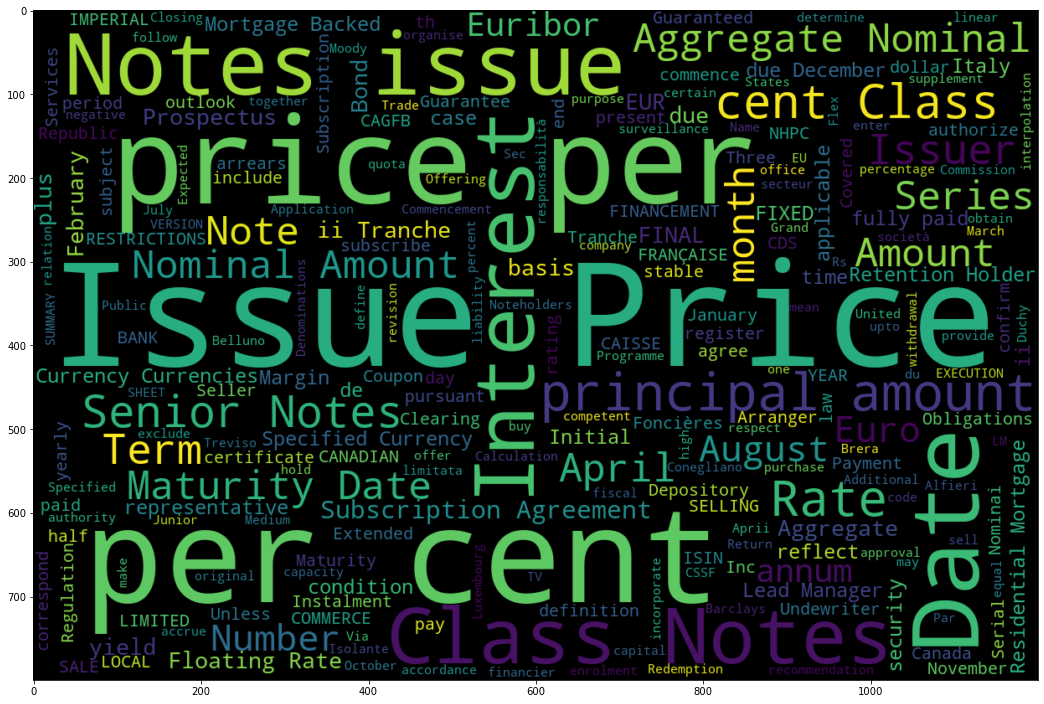

In [17]:
plt.figure(figsize = (18,24)) # Text Reviews with real disaster
wordcloud = WordCloud(min_font_size = 3,  max_words = 2500 , width = 1200 , height = 800).generate(" ".join(real))
plt.imshow(wordcloud,interpolation = 'bilinear')

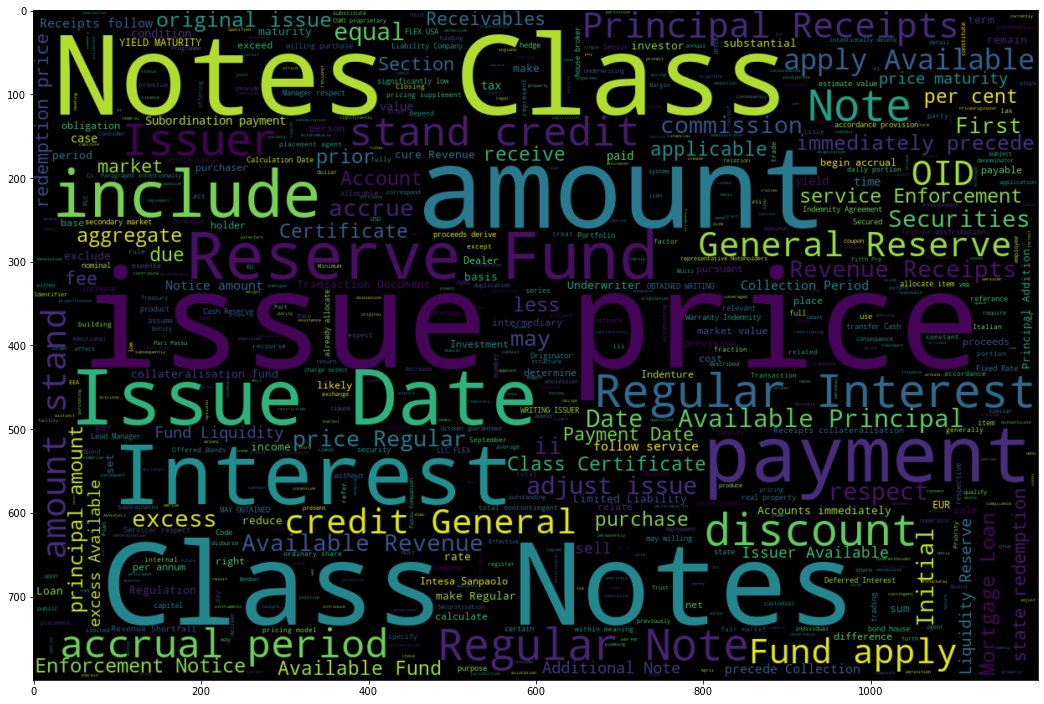

In [18]:
plt.figure(figsize = (18,24)) # Text Reviews with fake disaster
wordcloud = WordCloud(min_font_size = 3,  max_words = 2500 , width = 1200 , height = 800).generate(" ".join(fake))
plt.imshow(wordcloud,interpolation = 'bilinear')

**As we can see in wordcloud some words like 'amp' is very frequent in our both data so it makes sense to ignore this word using attribute max_df (explained below)**

In [19]:
x_train_text, x_val_text, y_train, y_val = train_test_split(train_df.text, train_df.choose_one, test_size=0.1, random_state=0)

In [20]:
tv=TfidfVectorizer(min_df=0,max_df=0.8,use_idf=True,ngram_range=(1,3))


tv_train_reviews=tv.fit_transform(x_train_text)


tv_val_reviews=tv.transform(x_val_text)


tv_test_reviews=tv.transform(test_df.text)

print('tfidf_train:',tv_train_reviews.shape)
print('tfidf_validation:',tv_val_reviews.shape)
print('tfidf_test:',tv_test_reviews.shape)

tfidf_train: (120, 4664)
tfidf_validation: (14, 4664)
tfidf_test: (1, 4664)


# Models

**1. Multinomial NaiveBayes Classifier**

In [21]:
# defining classifier
nb = MultinomialNB()

# fitting for tfidf vectorizer.
tfidf = nb.fit(tv_train_reviews, y_train)

In [22]:
tfidf_val_predict = tfidf.predict(tv_val_reviews)
print('Tfidf Vectorizer score :',accuracy_score(y_val, tfidf_val_predict))

Tfidf Vectorizer score : 1.0


In [23]:
print(classification_report(y_val, tfidf_val_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         4

    accuracy                           1.00        14
   macro avg       1.00      1.00      1.00        14
weighted avg       1.00      1.00      1.00        14



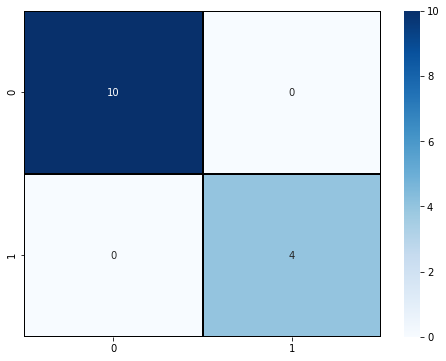

In [24]:
cm = confusion_matrix(y_val, tfidf_val_predict)
cm = pd.DataFrame(cm , index = [i for i in range(2)] , columns = [i for i in range(2)])
plt.figure(figsize = (8,6))
sns.heatmap(cm,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt='')

**2. SVC Classifier**

In [25]:
svc = SVC()
tfidf = svc.fit(tv_train_reviews, y_train)

In [26]:
tfidf_val_predict = tfidf.predict(tv_val_reviews)
print('Tfidf Vectorizer score :',accuracy_score(y_val, tfidf_val_predict))

Tfidf Vectorizer score : 0.9285714285714286


In [27]:
print(classification_report(y_val, tfidf_val_predict))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95        10
           1       1.00      0.75      0.86         4

    accuracy                           0.93        14
   macro avg       0.95      0.88      0.90        14
weighted avg       0.94      0.93      0.93        14



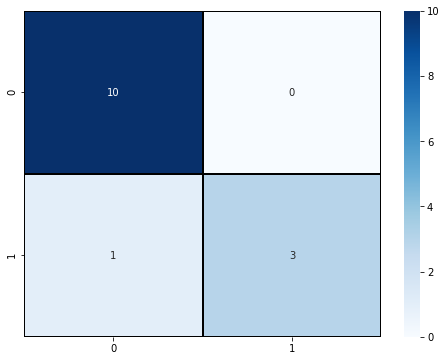

In [28]:
cm = confusion_matrix(y_val, tfidf_val_predict)
cm = pd.DataFrame(cm , index = [i for i in range(2)] , columns = [i for i in range(2)])
plt.figure(figsize = (8,6))
sns.heatmap(cm,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt='')

**3. XgBoostClassifier**

In [29]:
xgb = XGBClassifier()
tfidf = xgb.fit(tv_train_reviews, y_train)

In [30]:
tfidf_val_predict = tfidf.predict(tv_val_reviews)
print('Tfidf Vectorizer score :',accuracy_score(y_val, tfidf_val_predict))

Tfidf Vectorizer score : 0.9285714285714286


In [31]:
print(classification_report(y_val, tfidf_val_predict))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95        10
           1       1.00      0.75      0.86         4

    accuracy                           0.93        14
   macro avg       0.95      0.88      0.90        14
weighted avg       0.94      0.93      0.93        14



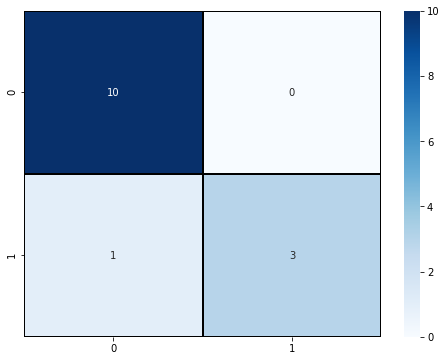

In [32]:
cm = confusion_matrix(y_val, tfidf_val_predict)
cm = pd.DataFrame(cm , index = [i for i in range(2)] , columns = [i for i in range(2)])
plt.figure(figsize = (8,6))
sns.heatmap(cm,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt='')

**4. Random Forest Classifier**

In [33]:
rfc = RandomForestClassifier()
tfidf = rfc.fit(tv_train_reviews, y_train)

In [34]:
tfidf_val_predict = tfidf.predict(tv_val_reviews)
print('Tfidf Vectorizer score :',accuracy_score(y_val, tfidf_val_predict))

Tfidf Vectorizer score : 0.9285714285714286


In [35]:
print(classification_report(y_val, tfidf_val_predict))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95        10
           1       1.00      0.75      0.86         4

    accuracy                           0.93        14
   macro avg       0.95      0.88      0.90        14
weighted avg       0.94      0.93      0.93        14



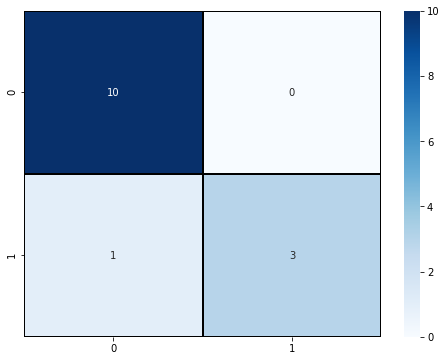

In [36]:
cm = confusion_matrix(y_val, tfidf_val_predict)
cm = pd.DataFrame(cm , index = [i for i in range(2)] , columns = [i for i in range(2)])
plt.figure(figsize = (8,6))
sns.heatmap(cm,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt='')

**5. Creating Our Model**

In [37]:
model = Sequential()

model.add(Dense(units = 512 , activation = 'relu' , input_dim = tv_train_reviews.shape[1]))
model.add(Dense(units = 256 , activation = 'relu'))
model.add(Dense(units = 100 , activation = 'relu'))
model.add(Dense(units = 10 , activation = 'relu'))
model.add(Dense(units = 1 , activation = 'sigmoid'))

model.compile(optimizer = 'adam' , loss = 'binary_crossentropy' , metrics = ['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               2388480   
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_3 (Dense)              (None, 100)               25700     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1010      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 11        
Total params: 2,546,529
Trainable params: 2,546,529
Non-trainable params: 0
_________________________________________________________________


In [38]:
history = model.fit(tv_train_reviews, y_train, validation_data=(tv_val_reviews, y_val), batch_size=128, epochs=30)

Train on 120 samples, validate on 14 samples
Epoch 1/30
120/120 [==============================] - 0s 4ms/step - loss: 0.6933 - accuracy: 0.4333 - val_loss: 0.6888 - val_accuracy: 0.7143
Epoch 2/30
120/120 [==============================] - 0s 448us/step - loss: 0.6868 - accuracy: 0.7000 - val_loss: 0.6803 - val_accuracy: 0.8571
Epoch 3/30
120/120 [==============================] - 0s 363us/step - loss: 0.6771 - accuracy: 0.8000 - val_loss: 0.6680 - val_accuracy: 0.8571
Epoch 4/30
120/120 [==============================] - 0s 399us/step - loss: 0.6643 - accuracy: 0.8667 - val_loss: 0.6530 - val_accuracy: 0.8571
Epoch 5/30
120/120 [==============================] - 0s 351us/step - loss: 0.6475 - accuracy: 0.9417 - val_loss: 0.6343 - val_accuracy: 0.9286
Epoch 6/30
120/120 [==============================] - 0s 373us/step - loss: 0.6258 - accuracy: 0.9750 - val_loss: 0.6094 - val_accuracy: 0.9286
Epoch 7/30
120/120 [==============================] - 0s 386us/step - loss: 0.5974 - accuracy

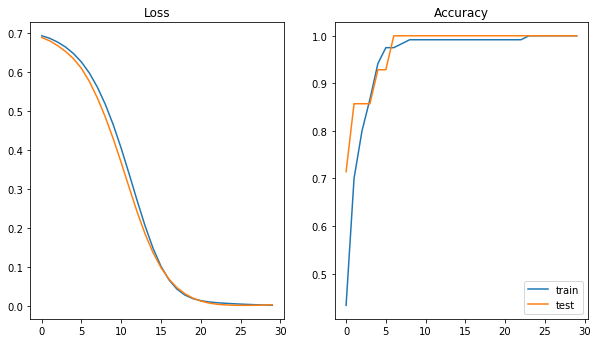

In [39]:
plt.figure(figsize=(10,12))
plt.subplot(221)
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')

plt.subplot(222)
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show()

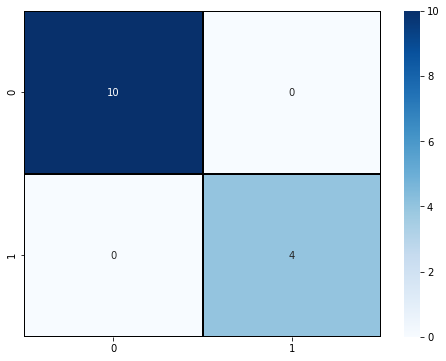

In [40]:
model_val_predict = model.predict_classes(tv_val_reviews)
cm = confusion_matrix(y_val, model_val_predict)
cm = pd.DataFrame(cm , index = [i for i in range(2)] , columns = [i for i in range(2)])
plt.figure(figsize = (8,6))
sns.heatmap(cm,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt='')

# Predicting For Test Data

In [41]:
y_pred = model.predict_classes(tv_test_reviews)
li=[]
al=[]
tt=0;
for i in range(0, len(y_pred)):
    if(y_pred[i]==1):
        al.append(y_pred[i])
        li+=li3[i]
        s=li3[i]
        s = s.lower()
        sub= "issue price"
        t = s.partition(sub)[2]
        print(s.partition(sub)[1])
        prilist = t.split(" ")
        for i in range(len(prilist)):
            if(not prilist[i].isalnum()):
                print(prilist[i:i+4])
                break
    if(y_pred[i]==0):
        tt=tt+1
#if(tt==len(y_pred)):
    #print("Issue Price:100%")
print(y_pred)

issue price
[':', '100%', 'coupon', 'rate:']
[[1]]


In [42]:
li=[]
al=[]
y_pred = rfc.predict(tv_test_reviews)
tt=0;
for i in range(0, len(y_pred)):
    if(y_pred[i]==1):
        al.append(y_pred[i])
        li+=li3[i]
        s=li3[i]
        s = s.lower()
        sub= "issue price"
        t = s.partition(sub)[2]
        print(s.partition(sub)[1])
        prilist = t.split(" ")
        for i in range(len(prilist)):
            if(not prilist[i].isalnum()):
                print(prilist[i:i+4])
                break
    if(y_pred[i]==0):
        tt=tt+1
#if(tt==len(y_pred)):
    #print("Issue Price:100%")
print(y_pred)

issue price
[':', '100%', 'coupon', 'rate:']
[1]


In [43]:
y_pred = xgb.predict(tv_test_reviews)
tt=0;
li=[]
al=[]
for i in range(0, len(y_pred)):
    if(y_pred[i]==1):
        li+=li3[i]
        s=li3[i]
        s = s.lower()
        sub= "issue price"
        t = s.partition(sub)[2]
        print(s.partition(sub)[1])
        prilist = t.split(" ")
        for i in range(len(prilist)):
            if(not prilist[i].isalnum()):
                print(prilist[i:i+4])
                break
    if(y_pred[i]==0):
        tt=tt+1
#if(tt==len(y_pred)):
    #print("Issue Price:100%")
print(y_pred)

[0]


In [44]:
y_pred = svc.predict(tv_test_reviews)
tt=0;
li=[]
al=[]
for i in range(0, len(y_pred)):
    if(y_pred[i]==1):
        li+=li3[i]
        s=li3[i]
        s = s.lower()
        sub= "issue price"
        t = s.partition(sub)[2]
        print(s.partition(sub)[1])
        prilist = t.split(" ")
        for i in range(len(prilist)):
            if(not prilist[i].isalnum()):
                print(prilist[i:i+4])
                break
    if(y_pred[i]==0):
        tt=tt+1
#if(tt==len(y_pred)):
    #print("Issue Price:100%")
print(y_pred)

issue price
[':', '100%', 'coupon', 'rate:']
[1]


In [45]:
y_pred = nb.predict(tv_test_reviews)
tt=0;
li=[]
al=[]
for i in range(0, len(y_pred)):
    if(y_pred[i]==1):
        li+=li3[i]
        s=li3[i]
        s = s.lower()
        sub= "issue price"
        t = s.partition(sub)[2]
        print(s.partition(sub)[1])
        prilist = t.split(" ")
        for i in range(len(prilist)):
            if(not prilist[i].isalnum()):
                print(prilist[i:i+4])
                break
    if(y_pred[i]==0):
        tt=tt+1
#if(tt==len(y_pred)):
    #print("Issue Price:100%")
for i in range(0, len(y_pred)):
    if(y_pred[i]==1):
        li+=li3[i]
        s=li3[i]
        s = s.lower()
        sub= "public offering price"
        t = s.partition(sub)[2]
        print(s.partition(sub)[1])
        prilist = t.split(" ")
        for i in range(len(prilist)):
            if(not prilist[i].isalnum()):
                print(prilist[i:i+4])
                break
print(y_pred)

issue price
[':', '100%', 'coupon', 'rate:']

['']
[1]
